# Работу выполнил:
### студент 21ПМИ-2
### Мальков Евгений Максимович

Парсер лежит в отдельном файле под названием `parcer.py`. Так же присутсвуют два `.json` файла, в одном из которых(`articles_links.json`) лежит список статей с категориями и ссылками на них, а уже в файле `data.json` лежат сами распаршенные в нужный формат новости

In [113]:
import numpy as np
import json
import pandas as pd
import re

In [114]:
with open("data.json") as f:
    data = pd.json_normalize(json.loads(f.read()))

Видим структуру собранного датасета и так же видим, что теги пустые. Я поздно заметил, что в выбранном мною источнике тегов нет и уже не стал переписывать парсер. Да и так же не понял зачем теги в целом были нужны, поэтому работа была выполнена без них

In [115]:
data

,article_id,title,category,tags,text
0,https://lenta.ru/news/2025/02/04/okean/,Предсказано увеличение уровня Мирового океана ...,science,[],Специалисты Даремского университета (Великобри...
1,https://lenta.ru/news/2025/02/03/otverstiya-ob...,Отверстия обнаружили на дне Атлантического океана,science,[],Участники экспедиции Национального управления ...
2,https://lenta.ru/news/2025/01/30/heart-patch/,Пластырь из стволовых клеток использовали для ...,science,[],Немецкие ученые успешно протестировали «сердеч...
3,https://lenta.ru/news/2025/01/25/roskosmos-pok...,«Роскосмос» показал фото крупнейшего в мире ай...,science,[],Госкорпорация «Роскосмос» показала в своем Tel...
4,https://lenta.ru/news/2025/01/22/na-zapade-zay...,На Западе заявили о беззащитности авианосцев С...,science,[],Российские гиперзвуковые ракеты «Орешник» обор...
...,...,...,...,...,...
4039,https://lenta.ru/news/2025/02/05/vivozi/,В России предложили способ борьбы с пустыми ва...,economics,[],Для борьбы с порожними вагонами на припортовых...
4040,https://lenta.ru/news/2025/02/05/chto-to-ne-to/,В Центробанке рассказали об ускорении роста эк...,economics,[],В конце прошлого года российская экономика не ...
4041,https://lenta.ru/news/2025/02/04/zhiteli-evrop...,Жители европейской страны начали массово выруб...,economics,[],В Финляндии резко нарастили вырубку леса на фо...
4042,https://lenta.ru/news/2025/02/04/v-sosedney-s-...,В соседней с Россией стране ускорился рост цен,economics,[],На фоне ускорившегося в Казахстане роста цен в...


# Предобработка текста

#### Смотрим на пример текста и попробуем обработать его так, чтобы получилась конфетка:

In [116]:
data["text"][0]

'Специалисты Даремского университета (Великобритания) рассказали о серьезных последствиях для всего мира из-за изменения климата. Слова ученых передает газета The Guardian. Опубликованное в журнале Nature исследование показало что ледяной щит Гренландии разрушается быстрее чем когда-либо прежде — это происходит из-за изменения климата. Оказалось что трещины в ледниках заметно увеличились в размерах за последние пять лет. Специалисты пришли к этому выводу на основе изучения 8000 трехмерных карт поверхности. «Несколько наших крупномасштабных моделей не смогли объяснить многое из того что мы называем динамической нестабильностью» — заметил автор исследования доктор Том Чадли. Специалисты предсказали что из-за динамической нестабильности уровень Мирового океана может увеличиться на один метр к 2100 году или на 10 метров к 2300 году. По словам Чадли больше всего ученых удивило как быстро образовывались трещины. Так одно из предыдущих исследований показало изменения которые произошли за пять

## Удаляем все символы, кроме кириллицы и латиницы

In [117]:
data["text"] = data["text"].apply(lambda text: " ".join(re.sub(r'[^а-яА-Яa-zA-Z\s]', ' ', text).lower().split()))

In [118]:
data["text"][0]

'специалисты даремского университета великобритания рассказали о серьезных последствиях для всего мира из за изменения климата слова ученых передает газета the guardian опубликованное в журнале nature исследование показало что ледяной щит гренландии разрушается быстрее чем когда либо прежде это происходит из за изменения климата оказалось что трещины в ледниках заметно увеличились в размерах за последние пять лет специалисты пришли к этому выводу на основе изучения трехмерных карт поверхности несколько наших крупномасштабных моделей не смогли объяснить многое из того что мы называем динамической нестабильностью заметил автор исследования доктор том чадли специалисты предсказали что из за динамической нестабильности уровень мирового океана может увеличиться на один метр к году или на метров к году по словам чадли больше всего ученых удивило как быстро образовывались трещины так одно из предыдущих исследований показало изменения которые произошли за пять лет в масштабе десятилетий мы уже

 ## Лемматизируем текст

#### лемматизация проводилась только для русских слов, так как английских слов в текстах крайне мало и чаще всего они встречаются в одной единственной форме, что нас устраивает


In [119]:
import pymorphy2

morph = pymorphy2.MorphAnalyzer()

def lemmatize_text(text):
    words = text.split()
    lemmatized_words = [morph.parse(word)[0].normal_form for word in words]
    lemmatized_text = ' '.join(lemmatized_words)
    return lemmatized_text


data["text"] = data["text"].apply(lemmatize_text)
data["text"][0]

'специалист даремский университет великобритания рассказать о серьёзный последствие для весь мир из за изменение климат слово учёный передавать газета the guardian опубликовать в журнал nature исследование показать что ледяной щит гренландия разрушаться быстрый чем когда либо прежде это происходить из за изменение климат оказаться что трещина в ледник заметно увеличиться в размер за последний пять год специалист прислать к этот вывод на основа изучение трёхмерный карта поверхность несколько наш крупномасштабный модель не смочь объяснить многое из тот что мы называть динамический нестабильность заметить автор исследование доктор тот чадли специалист предсказать что из за динамический нестабильность уровень мировой океан мочь увеличиться на один метр к год или на метр к год по слово чадли большой весь учёный удивить как быстро образовываться трещина так один из предыдущий исследование показать изменение который произойти за пять год в масштаб десятилетие мы уже несколько год знать что ра

In [120]:
reserve_copy_pymorphy = data.copy()

In [124]:
data = reserve_copy_pymorphy.copy()

In [125]:
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
stop_words = set(stopwords.words('russian'))

def delete_stop_words(text):
    return " ".join([word for word in text.split() if word not in stop_words])

data["text"] = data["text"].apply(delete_stop_words)
data["text"][0]

[nltk_data] Downloading package stopwords to /home/krosha/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


'специалист даремский университет великобритания рассказать серьёзный последствие весь мир изменение климат слово учёный передавать газета the guardian опубликовать журнал nature исследование показать ледяной щит гренландия разрушаться быстрый либо прежде это происходить изменение климат оказаться трещина ледник заметно увеличиться размер последний пять год специалист прислать вывод основа изучение трёхмерный карта поверхность несколько наш крупномасштабный модель смочь объяснить многое называть динамический нестабильность заметить автор исследование доктор чадли специалист предсказать динамический нестабильность уровень мировой океан мочь увеличиться метр год метр год слово чадли большой весь учёный удивить быстро образовываться трещина предыдущий исследование показать изменение который произойти пять год масштаб десятилетие несколько год знать разрушение ледяной покров значительно ускориться год целое понимать это связать потепление океан подчеркнуть специалист гренландия год находит

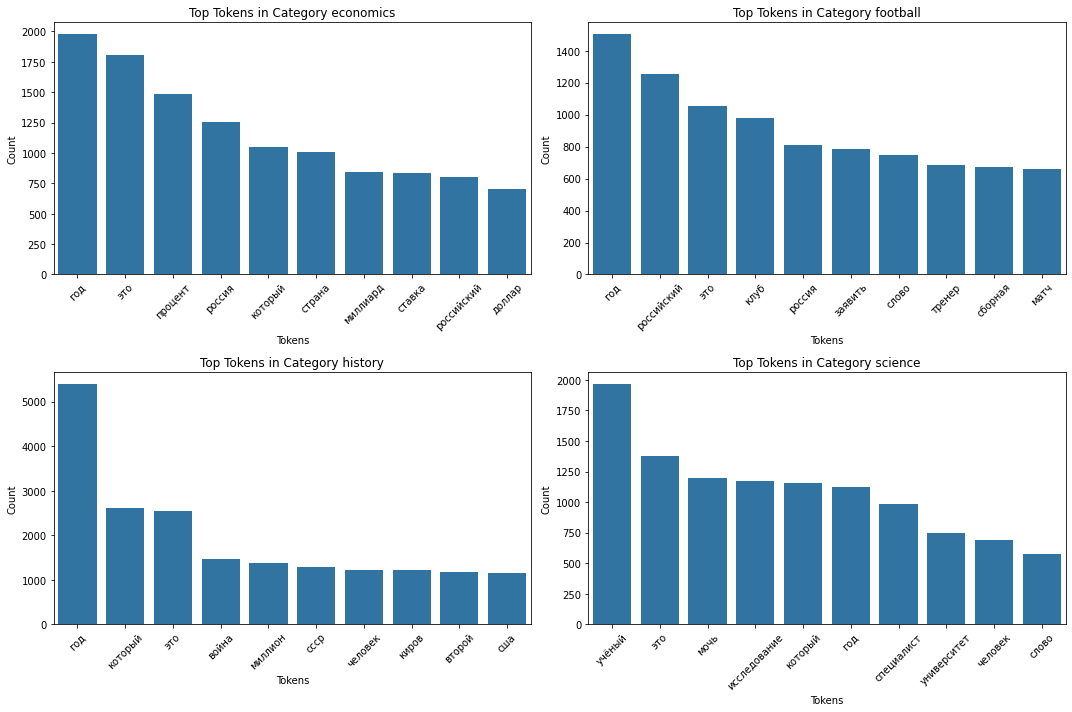

In [126]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer


vectorizer = CountVectorizer()

category_tokens = {}

for category, group in data.groupby('category'):
    X = vectorizer.fit_transform(group['text'])
    token_counts = X.toarray().sum(axis=0)
    tokens_data = pd.DataFrame(token_counts, index=vectorizer.get_feature_names_out(), columns=['count'])
    category_tokens[category] = tokens_data.sort_values(by='count', ascending=False)

plt.figure(figsize=(15, 10))

for i, (category, tokens_data) in enumerate(category_tokens.items()):
    plt.subplot(2, 2, i + 1)
    sns.barplot(x=tokens_data['count'][:10].index, y=tokens_data['count'][:10].values)
    plt.title(f'Top Tokens in Category {category}')
    plt.xlabel('Tokens')
    plt.ylabel('Count')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [127]:
y = data["category"]

data = data.drop(["article_id", "category"], axis=1)
data

,title,tags,text
0,Предсказано увеличение уровня Мирового океана ...,[],специалист даремский университет великобритани...
1,Отверстия обнаружили на дне Атлантического океана,[],участник экспедиция национальный управление ок...
2,Пластырь из стволовых клеток использовали для ...,[],немецкий учёный успешно протестировать сердечн...
3,«Роскосмос» показал фото крупнейшего в мире ай...,[],госкорпорация роскосмос показать свой telegram...
4,На Западе заявили о беззащитности авианосцев С...,[],российский гиперзвуковой ракета орешник оборуд...
...,...,...,...
4039,В России предложили способ борьбы с пустыми ва...,[],борьба порожний вагон припортовый станция минт...
4040,В Центробанке рассказали об ускорении роста эк...,[],конец прошлое год российский экономика замедля...
4041,Жители европейской страны начали массово выруб...,[],финляндия резко нарастить вырубка лес фон дефи...
4042,В соседней с Россией стране ускорился рост цен,[],фон ускориться казахстан рост цена страна потр...


In [128]:
y

0         science
1         science
2         science
3         science
4         science
          ...    
4039    economics
4040    economics
4041    economics
4042    economics
4043    economics
Name: category, Length: 4044, dtype: object

In [129]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
y

array([3, 3, 3, ..., 0, 0, 0])

In [131]:
label_to_category = {
    0: "economics",
    1: "football",
    2: "history",
    3: "science"
}

def get_category(label: int) -> str:
    return label_to_category[label]

In [65]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.25)

In [66]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer()
tf_train = tfidf.fit_transform(X_train["text"])
tf_test = tfidf_vect.transform(X_test["text"])
print(tf_train[0])

  (0, 11194)	0.10188770496577998
  (0, 7336)	0.0888972845714289
  (0, 9383)	0.06429130927189068
  (0, 3208)	0.07948587260898707
  (0, 3692)	0.0770379361178371
  (0, 7647)	0.08064760610238127
  (0, 9493)	0.05725852221359415
  (0, 8557)	0.03577647517900226
  (0, 2561)	0.04449043759990722
  (0, 8400)	0.04181315119348417
  (0, 6690)	0.08232479137390764
  (0, 7334)	0.06502487927822173
  (0, 6057)	0.09942767137407071
  (0, 8747)	0.03958570902268735
  (0, 5429)	0.09942767137407071
  (0, 1740)	0.05906903843141439
  (0, 7492)	0.0680071660425959
  (0, 10001)	0.09726660692622228
  (0, 9533)	0.09360101353113351
  (0, 5344)	0.05786034983125278
  (0, 5816)	0.08954488071412024
  (0, 841)	0.05747502252596476
  (0, 8598)	0.06290904334147814
  (0, 7533)	0.053842386160129894
  (0, 1716)	0.07787409589154103
  :	:
  (0, 3634)	0.059009582845833554
  (0, 8264)	0.04402385375378278
  (0, 11158)	0.04641932283252771
  (0, 809)	0.20377540993155996
  (0, 1108)	0.20123048020126866
  (0, 11064)	0.18043384028640153
 

In [93]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report


models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(),
#     'SVM': SVC(),
#     'KNeighbors': KNeighborsClassifier(),
#     'Gradient Boosting': GradientBoostingClassifier()
}

In [94]:
param_grids = {
    'Logistic Regression': {
        'C': [0.01, 0.1, 1, 10, 100],
        'solver': ['liblinear', 'saga']
    },
    'Random Forest': {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20, 30]
    },
    'SVM': {
        'C': [0.01, 0.1, 1, 10, 100],
        'kernel': ['linear', 'rbf']
    },
    'KNeighbors': {
        'n_neighbors': [3, 5, 7, 9],
        'weights': ['uniform', 'distance']
    },
    'Gradient Boosting': {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 7]
    }
}

In [95]:
results = {}
best_models = {}

for model_name, model in models.items():
    print(f"Training {model_name}...")
    grid_search = GridSearchCV(model, param_grids[model_name], cv=5, scoring='accuracy', n_jobs=-1, return_train_score=True)
    grid_search.fit(tf_train, y_train)
    
    results[model_name] = grid_search.cv_results_
    best_models[model_name] = grid_search.best_estimator_


Training Logistic Regression...
Training Random Forest...



Classification report for Logistic Regression:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       253
           1       1.00      1.00      1.00       240
           2       0.98      0.98      0.98       267
           3       0.98      0.98      0.98       251

    accuracy                           0.99      1011
   macro avg       0.99      0.99      0.99      1011
weighted avg       0.99      0.99      0.99      1011



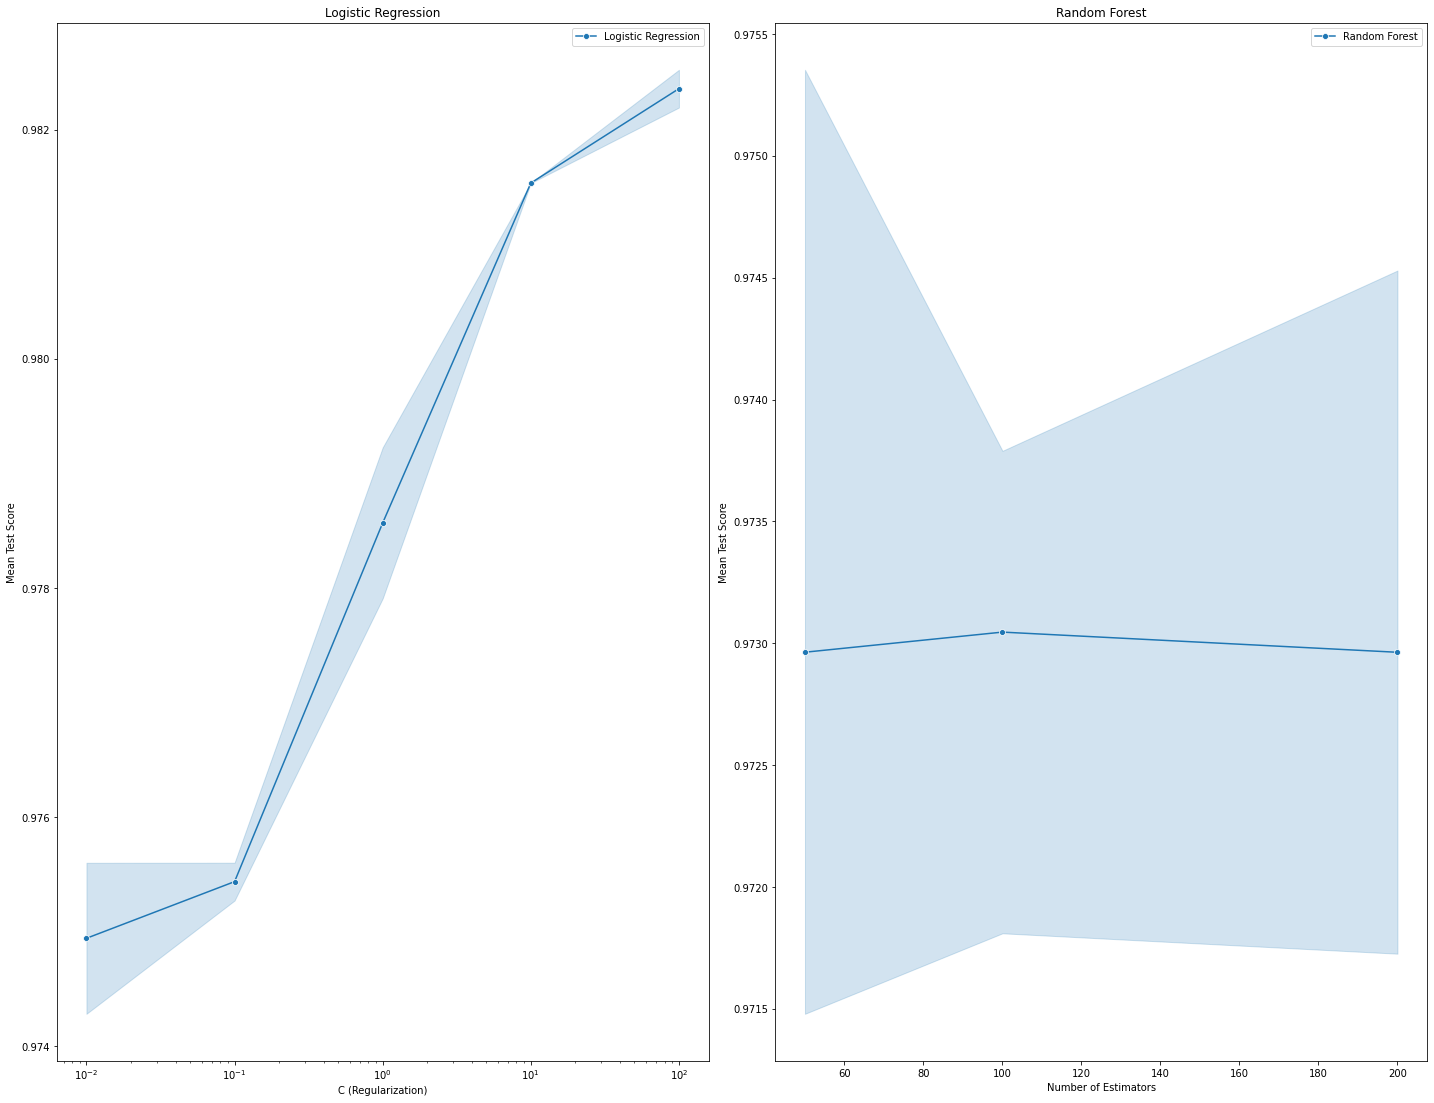

Evaluating Logistic Regression...
Classification Report for Logistic Regression:
              precision    recall  f1-score   support

   economics       1.00      1.00      1.00       253
    football       1.00      1.00      1.00       240
     history       0.98      0.98      0.98       267
     science       0.98      0.98      0.98       251

    accuracy                           0.99      1011
   macro avg       0.99      0.99      0.99      1011
weighted avg       0.99      0.99      0.99      1011

Evaluating Random Forest...
Classification Report for Random Forest:
              precision    recall  f1-score   support

   economics       1.00      1.00      1.00       253
    football       1.00      1.00      1.00       240
     history       0.98      0.94      0.96       267
     science       0.94      0.98      0.96       251

    accuracy                           0.98      1011
   macro avg       0.98      0.98      0.98      1011
weighted avg       0.98      0.98  

In [140]:
plt.figure(figsize=(30, 30))

for model_name, result in results.items():
    if model_name == 'Logistic Regression':
        plt.subplot(2, 3, 1)
        sns.lineplot(x=result['param_C'], y=result['mean_test_score'], marker='o', label=model_name)
        plt.xscale('log')
        plt.title('Logistic Regression')
        plt.xlabel('C (Regularization)')
        plt.ylabel('Mean Test Score')
    
    elif model_name == 'Random Forest':
        plt.subplot(2, 3, 2)
        sns.lineplot(x=result['param_n_estimators'], y=result['mean_test_score'], marker='o', label=model_name)
        plt.title('Random Forest')
        plt.xlabel('Number of Estimators')
        plt.ylabel('Mean Test Score')
    
    elif model_name == 'SVM':
        plt.subplot(2, 3, 3)
        sns.lineplot(x=result['param_C'], y=result['mean_test_score'], marker='o', label=model_name)
        plt.xscale('log')
        plt.title('SVM')
        plt.xlabel('C (Regularization)')
        plt.ylabel('Mean Test Score')
    elif model_name == 'KNeighbors':
        plt.subplot(2, 3, 4)
        sns.lineplot(x=result['param_n_neighbors'], y=result['mean_test_score'], marker='o', label=model_name)
        plt.title('K-Neighbors')
        plt.xlabel('Number of Neighbors')
        plt.ylabel('Mean Test Score')
    
    elif model_name == 'Gradient Boosting':
        plt.subplot(2, 3, 5)
        sns.lineplot(x=result['param_n_estimators'], y=result['mean_test_score'], marker='o', label=model_name)
        plt.title('Gradient Boosting')
        plt.xlabel('Number of Estimators')
        plt.ylabel('Mean Test Score')

plt.tight_layout()
plt.legend()
plt.show()

vgc = np.vectorize(get_category)

for model_name, model in best_models.items():
    print(f"Evaluating {model_name}...")
    y_pred = model.predict(tf_test)
    print(f"Classification Report for {model_name}:\n{classification_report(vgc(y_test), vgc(y_pred))}")

In [135]:
y_test

array([1, 0, 2, ..., 0, 1, 3])

In [141]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


plt.figure(figsize=(20, 15))

subplot_index = 1

for model_name, model in models.items():
    y_pred = model.predict(tf_test)
    
    cm = confusion_matrix(y_test, y_pred)
    
    plt.subplot(3, 2, subplot_index)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    
    subplot_index += 1

plt.tight_layout()
plt.show()

NotFittedError: This LogisticRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

<Figure size 1440x1080 with 0 Axes>